<a href="https://colab.research.google.com/github/egioia92/Machine-Learning/blob/main/Assignment_Predictive_Modelling_using_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment Predictive Modelling Using R

BACKGROUND

The data for modeling contains information on Selling price of each house in million Rs. It also contains Carpet area in square feet, Distance from nearest metro station and Number of schools within 2 km distance. The data has 198 rows and 5 columns.

Notes:

Dependent Variable:
- Houses selling price

Indepented variables:
- Carpet area in square feet
- Distance from nearest metro station
- Number of schools within 2 km distance


# Question 1 : Import House Price Data. Check the structure of the data


### Import House Price Data. Check the structure of the data

This step involves loading the dataset from a CSV file and displaying the first few rows to understand the structure of the data.

In [ ]:
# Import data
data <- read.csv("/content/House Price Data.csv", header=T)

# Display first few rows of data
head(data)

,Houseid,Price,Area,Distance,Schools
,<int>,<dbl>,<int>,<dbl>,<int>
1,1,24.74,1036,3.22,2
2,2,20.15,1030,4.33,3
3,3,25.98,1046,1.94,3
4,4,20.10,950,2.45,2
5,5,23.03,952,2.47,2
6,6,21.02,967,3.64,2


In [ ]:
# Check the structure of the data
str(data)

'data.frame':	198 obs. of  5 variables:
 $ Houseid : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Price   : num  24.7 20.1 26 20.1 23 ...
 $ Area    : int  1036 1030 1046 950 952 967 825 1162 1066 1084 ...
 $ Distance: num  3.22 4.33 1.94 2.45 2.47 3.64 1.49 2.26 1.93 1.47 ...
 $ Schools : int  2 3 3 2 2 2 2 3 3 2 ...


In [ ]:
summary(data)

    Houseid           Price            Area         Distance    
 Min.   :  1.00   Min.   :16.30   Min.   : 825   Min.   :0.100  
 1st Qu.: 50.25   1st Qu.:21.53   1st Qu.: 967   1st Qu.:1.930  
 Median : 99.50   Median :25.30   Median :1033   Median :2.260  
 Mean   : 99.50   Mean   :25.39   Mean   :1040   Mean   :2.335  
 3rd Qu.:148.75   3rd Qu.:28.67   3rd Qu.:1094   3rd Qu.:3.040  
 Max.   :198.00   Max.   :35.49   Max.   :1345   Max.   :4.330  
    Schools     
 Min.   :1.000  
 1st Qu.:2.000  
 Median :3.000  
 Mean   :2.495  
 3rd Qu.:3.000  
 Max.   :3.000  

In [ ]:
# Count of missing values (NAs) in each column of the dataset data.
colSums(is.na(data))

Houseid    Price     Area Distance  Schools 
       0        0        0        0        0

In [ ]:
# Remove the column named "Houseid" from the dataset data
data$Houseid <- NULL
head(data)

,Price,Area,Distance,Schools
,<dbl>,<int>,<dbl>,<int>
1,24.74,1036,3.22,2
2,20.15,1030,4.33,3
3,25.98,1046,1.94,3
4,20.10,950,2.45,2
5,23.03,952,2.47,2
6,21.02,967,3.64,2


### Correlation Matrix using Heatmap

A heatmap of the correlation matrix helps visualize the relationships between variables, with color gradients representing the strength of the correlations.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’




,Price,Area,Distance,Schools
Price,1.00,0.79,-0.40,0.62
Area,0.79,1.00,0.01,0.60
Distance,-0.40,0.01,1.00,-0.13
Schools,0.62,0.60,-0.13,1.00


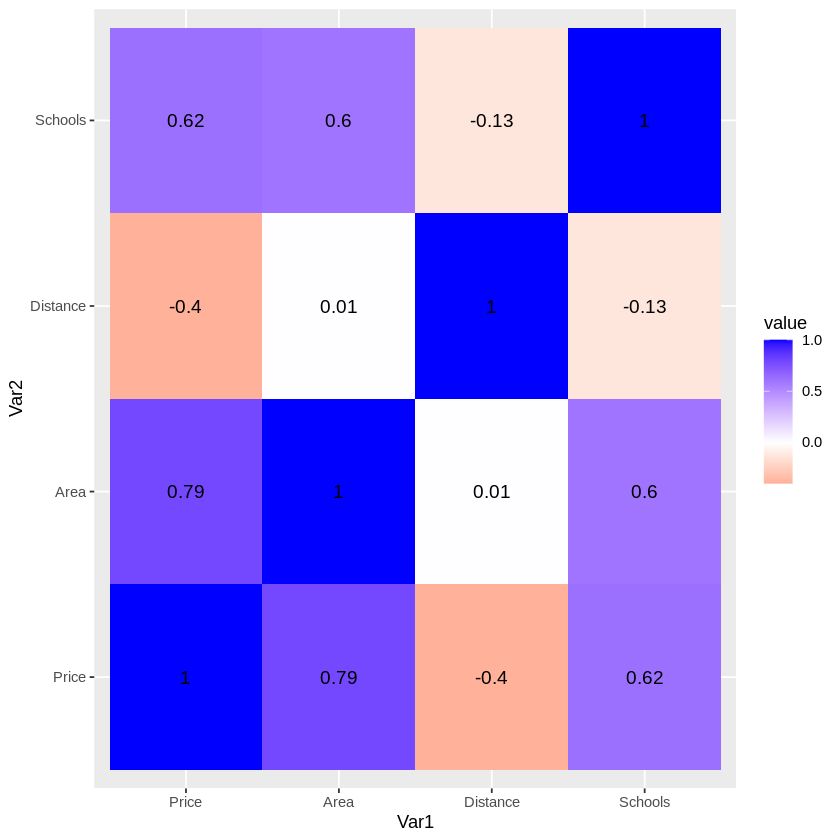

In [ ]:
# Load necessary libraries
install.packages("reshape2");
library(ggplot2)
library(reshape2)

# Compute correlation matrix
corr_matrix <- round( cor(data), 2)
corr_matrix
# Melt the correlation matrix
# The melt function transforms (or "melts") a data frame into a long format.
melted_corr_matrix <- melt(corr_matrix)


# Plot heatmap
ggplot(data = melted_corr_matrix, aes(x=Var1, y=Var2, fill=value)) +
geom_tile()+
geom_text(aes(Var2, Var1, label = value), color = "black", size = 4)+
scale_fill_gradient2(low="red",mid="white",high="blue")

Observations:
- Price and Area: There is a strong positive correlation. As the area of the house increass, the price of the house tends to increase as well.
- Price and Distance: Moderate negative correlation. As the distance from the metro station increases, the price of the house tends to decrease.
- Price and Schools: There is a positive correlation. Houses close more schools tend to have higher prices.

# Question 2 : Split the data into Training (80%) and Testing (20%) data sets

### Split the data into Training (80%) and Testing (20%) data sets

Splitting the data into training and testing sets allows us to build and evaluate the model on different subsets of the data, which helps in assessing the model's performance.

In [ ]:
# Load necessary libraries
install.packages("caret");
library(caret)

# Split data
set.seed(123) # for reproducibility
# 80% of the data is selected for the training set
index <- createDataPartition(data$Price, p=0.8, list=FALSE)

traindata<-data[index,]
testdata<-data[-index,]

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘pROC’, ‘recipes’


Loading required package: lattice



# Question 3 : Build a regression model on training data to estimate selling price of a House.

### Build a regression model on training data to estimate selling price of a House.

This step involves fitting a linear regression model to the training data to establish the relationship between the dependent variable and the independent variables

In [ ]:
# Build model
model<-lm(Price~ ., data = traindata)
model


Call:
lm(formula = Price ~ ., data = traindata)

Coefficients:
(Intercept)         Area     Distance      Schools  
     -8.924        0.034       -1.852        1.308  


#Question 4 : List down significant variables and interpret their regression coefficients

### List down significant variables and interpret their regression coefficients

The summary of the linear regression model includes parameter estimates (coefficients), R-squared value, p-values, and other statistics that help evaluate the model

In [ ]:
# Print the model summary
summary(model)


Call:
lm(formula = Price ~ ., data = traindata)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4480 -1.2728  0.1852  1.6010  4.4009 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -8.924400   1.915484  -4.659 6.76e-06 ***
Area         0.033997   0.002216  15.340  < 2e-16 ***
Distance    -1.852190   0.187372  -9.885  < 2e-16 ***
Schools      1.307781   0.420061   3.113   0.0022 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.277 on 156 degrees of freedom
Multiple R-squared:  0.7839,	Adjusted R-squared:  0.7798 
F-statistic: 188.7 on 3 and 156 DF,  p-value: < 2.2e-16


Observations:
- All variables are significant as p values are smaller than 0.05
-  The coefficients for the predictor variables suggest their respective impact on the price. The variables Area and Schools have positive effects, while Distance has a negative effect.


# Question 5 : What is the R2 and adjusted R2 of the model? Give interpretation



### What is the R2 and adjusted R2 of the model? Give interpretation


- The model’s R² value is 0.78, indicating that approximately 78% of the variability in Price is explained by the model.

R² values can sometimes be misleading as adding more predictors to a model can artificially inflate the R² value, even if the predictors are irrelevant.

- The Adjusted R-squared is 0.7798. Adjusted R-squared adjusts the R² statistic based on the number of predictors in the model.
As we can see they are comparable.

Unlike R², the Adjusted R² can decrease if predictors do not improve the model beyond what would be expected by chance.

It is always lower or equal to R², and it provides a more honest representation of the model fit when dealing with multiple predictors.

As we can see they are comparable.

# Question 6 : Is there a multicollinearity problem? If yes, do the necessary steps to remove it




The Variance Inflation Factor (VIF) measures the extent of multicollinearity in the regression model. High VIF values indicate multicollinearity issues.

In [ ]:
# Calculate VIF
install.packages("car")
library(car)
vif(model)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData



Area Distance  Schools 
1.545118 1.026447 1.564728

Observations:
- There is no multicollinearity problem as all VIF’s are less than 5

# Question 7 : Are there any influential observations in the data?

Influential observations in a dataset is an important step in regression analysis, as these points can disproportionately affect the results of the model.

In [ ]:
influ<-influence.measures(model)
influ

Influence measures of
	 lm(formula = Price ~ ., data = traindata) :

       dfb.1_  dfb.Area  dfb.Dstn  dfb.Schl     dffit cov.r   cook.d    hat inf
3   -8.18e-03  1.98e-02  6.54e-03 -3.71e-02 -5.23e-02 1.036 6.89e-04 0.0143    
5    4.45e-02 -2.20e-02  6.72e-03 -2.66e-02  7.72e-02 1.027 1.49e-03 0.0126    
6    1.90e-02 -1.52e-02  5.59e-02 -1.72e-02  8.08e-02 1.042 1.64e-03 0.0227    
7   -1.29e-01  1.03e-01  3.99e-02 -1.54e-02 -1.38e-01 1.054 4.75e-03 0.0385    
8   -5.31e-02  4.19e-02 -8.86e-04  1.41e-02  8.20e-02 1.032 1.69e-03 0.0161    
9   -6.47e-05  7.38e-04  5.19e-04 -2.11e-03 -3.29e-03 1.039 2.72e-06 0.0129    
10   9.01e-03 -3.15e-02  2.59e-02  3.81e-02 -5.03e-02 1.054 6.36e-04 0.0285    
11   1.18e-02 -1.02e-02  9.71e-03 -1.25e-03  2.01e-02 1.047 1.01e-04 0.0207    
12  -3.90e-02  5.00e-02 -1.03e-01  1.62e-02  1.49e-01 1.032 5.55e-03 0.0262    
13   2.89e-03 -1.38e-05 -5.52e-03 -2.53e-03  6.69e-03 1.066 1.13e-05 0.0371    
16   2.95e-02 -7.27e-02 -1.36e-02  1.32e-01  1.82e-

Warning message in plot.window(...):
“"id.method" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"id.method" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"id.method" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"id.method" is not a graphical parameter”
Warning message in box(...):
“"id.method" is not a graphical parameter”
Warning message in title(...):
“"id.method" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"id.method" is not a graphical parameter”


,StudRes,Hat,CookD
,<dbl>,<dbl>,<dbl>
17,1.6322087,0.07931898,0.05677421
32,-2.8517258,0.03216391,0.06461110
35,0.9261824,0.09323679,0.02207103
98,-2.9480444,0.03216391,0.06881371
116,1.7447197,0.07931898,0.06471511


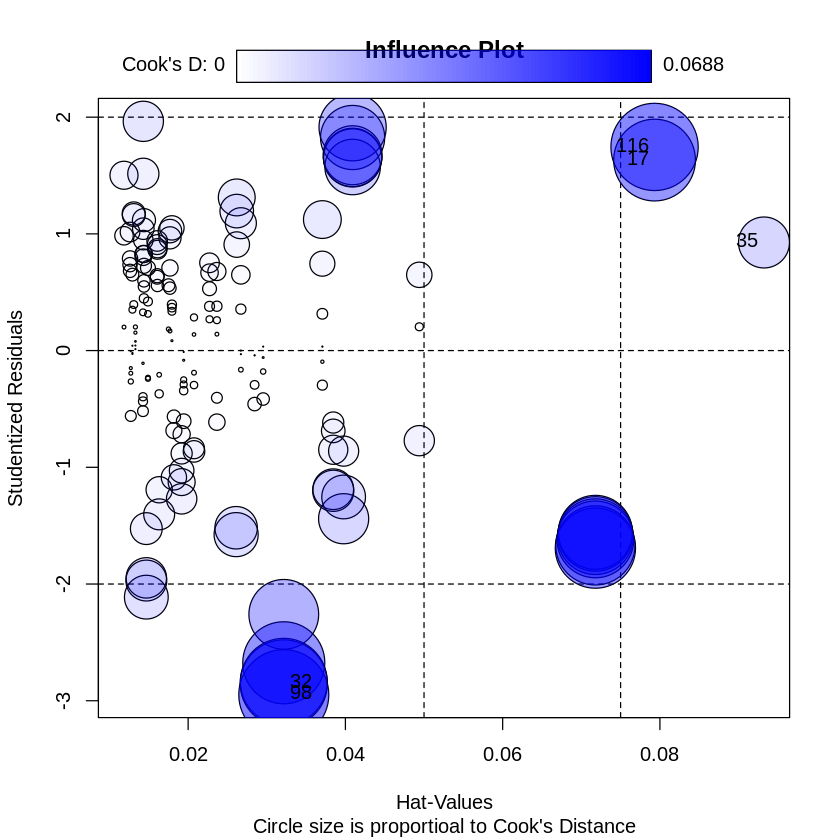

In [ ]:
influencePlot(model,
              id.method="identify",
              main="Influence Plot",
              sub="Circle size is proportioal to Cook's Distance")

Observations:
- Observations 17, 32, 35, 98, 116 are influential, as indicated by the large circle sizes. They have a substantial effect on the regression model.

# Question 8 : Can we assume that errors follow ‘Normal’ distribution?

The histogram and Q-Q plot help check if the residuals follow a normal distribution, which is an assumption of linear regression.

If the residuals follow a normal distribution, it validates one of the regression assumptions, supporting the reliability of confidence intervals and hypothesis tests.

If the data are truly sampled from a normal distribution the Q-Q plot will be linear

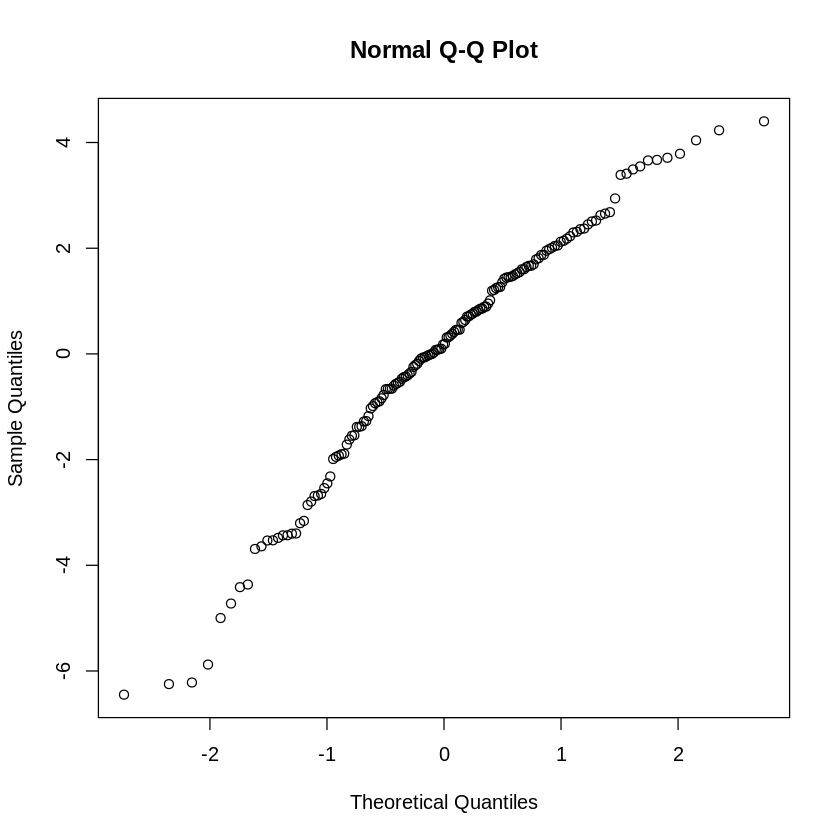

In [ ]:
traindata$fit<-fitted(model)
traindata$res<-residuals(model)

qqnorm(traindata$res)

Observation: The points do not seems to sit on a line

In [ ]:
shapiro.test(traindata$res)


	Shapiro-Wilk normality test

data:  traindata$res
W = 0.97169, p-value = 0.002271


The Shapiro-Wilk test, commonly referred to as the Shapiro test, is a statistical test used to assess the normality of a dataset.

the p-value is less than 0.05, the null hypothesis is rejected, indicating that the data do not follow a normal distribution.

The Lilliefors test is a variation of the Kolmogorov-Smirnov (K-S) test that is specifically adjusted for testing the null hypothesis that a dataset comes from a normally distributed population.

In [ ]:
install.packages("nortest");
library(nortest)
lillie.test(traindata$res)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




	Lilliefors (Kolmogorov-Smirnov) normality test

data:  traindata$res
D = 0.077284, p-value = 0.02073


Observation:  p-value ≤ 0.05 indicates that the data do not follow a normal distribution.

# Question 9 : Is there a Heteroscedasticity problem? Check using residual vs. predictor plots.


We want to diagnose the fit of the model by visualizing the distribution of residuals (errors).

Ideally, residuals should be randomly scattered around zero.

If the residuals are randomly scattered around zero, it suggests that the model’s assumptions are likely satisfied and the model provides a good fit.

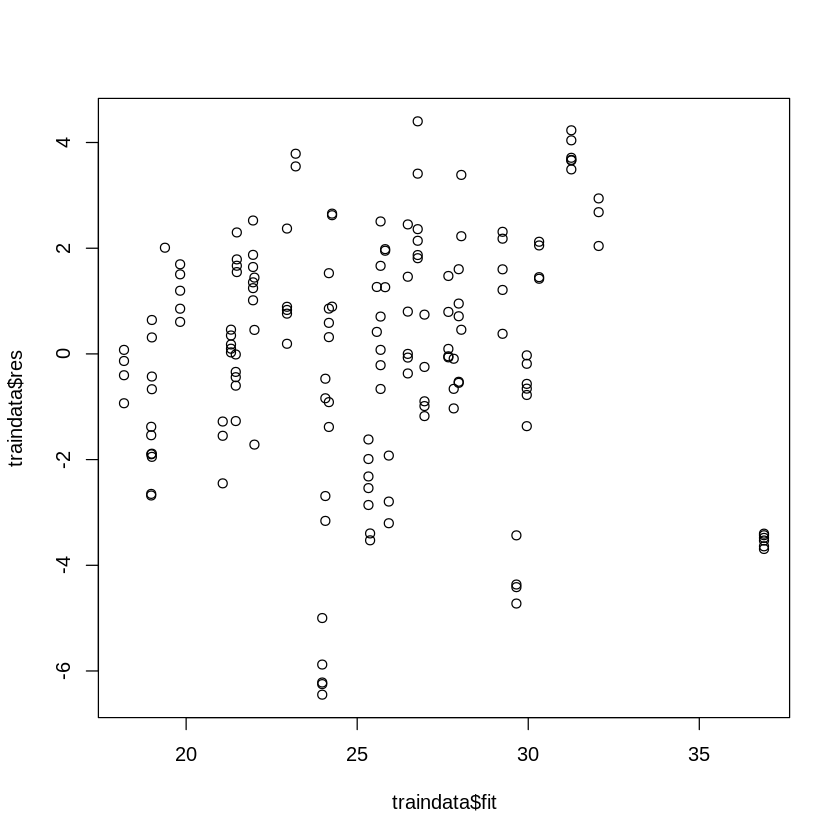

In [ ]:
plot(traindata$fit,traindata$res)

Observation:
- Residuals in the model are randomly distributed indicating NO presence of Heteroscedasticity

# Question 10: Calculate the RMSE for the Training and Testing data. Multiple Linear Regression

The Root Mean Squared Error (RMSE) measures the average magnitude of the errors between predicted and actual values, providing an indication of model accuracy.

In [ ]:
RMSE<-sqrt(mean(traindata$res**2))
RMSE

[1] 2.248768

Validating the model on the test set using RMSE helps assess its performance on unseen data.

In [ ]:
testdata$pred<-predict(model,testdata)
testdata$res<-(testdata$Price-testdata$pred)
RMSEtest<-sqrt(mean(testdata$res**2))
RMSEtest

[1] 1.980458

Obseravation:The similarity in RMSE between the test and train data suggests that the regression model generalizes reasonably well, with consistent prediction accuracy on both datasets. This implies that the model is stable and not overfitting to the training data.

In [ ]:
kfolds<-trainControl(method="cv",number=4)
kmodel<- train(Price~.,data=data,method="lm",
trControl=kfolds)
kmodel

Linear Regression 

198 samples
  3 predictor

No pre-processing
Resampling: Cross-Validated (4 fold) 
Summary of sample sizes: 148, 148, 148, 150 
Resampling results:

  RMSE      Rsquared  MAE     
  2.264721  0.79276   1.791917

Tuning parameter 'intercept' was held constant at a value of TRUE

Comment: RMSE and R squared values using K-fold validation are similar to overall RMSE and R squared
values